In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [2]:
#import fashion MNIST data

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
#Explore the data

train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

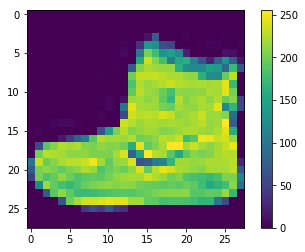

In [6]:
#preprocess the data 
#The data must be preprocessed before training the network. 
#If you inspect the first image in the training set, you will see that the pixel values 
#fall in the range of 0 to 255:

plt.figure()
plt.imshow(train_images[0])

plt.colorbar()
plt.grid(False)
plt.show()


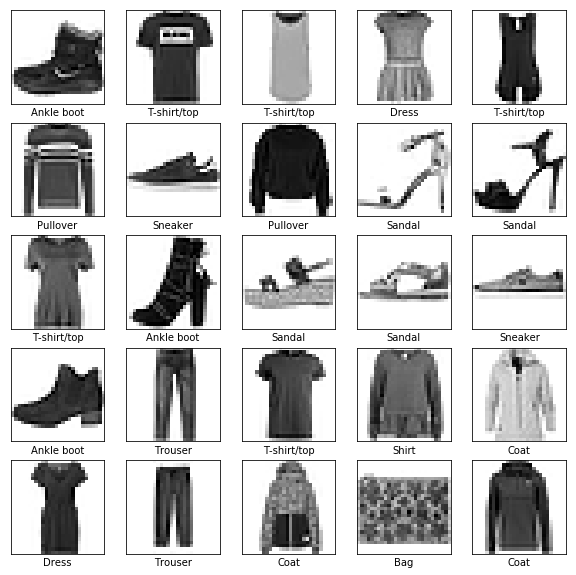

In [7]:
#Display the first 25 images from the training set and display the class name below each image. 
#Verify that the data is in the correct format and we're ready to build and train the network.

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap =plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [8]:
# now we will create the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0712 08:04:10.887109 139668105127808 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=5, validation_data=(train_images, train_labels))

Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4892 - acc: 0.8336 - val_loss: 0.4922 - val_acc: 0.8364
Epoch 2/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4859 - acc: 0.8358 - val_loss: 0.4937 - val_acc: 0.8281
Epoch 3/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4747 - acc: 0.8380 - val_loss: 0.4213 - val_acc: 0.8550
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4675 - acc: 0.8431 - val_loss: 0.4552 - val_acc: 0.8491
Epoch 5/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4707 - acc: 0.8428 - val_loss: 0.4944 - val_acc: 0.8404


In [11]:
#evaluate the accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc*100,'%')

10000/10000 [==============================] - 0s 29us/sample - loss: 0.5326 - acc: 0.8247
Test accuracy: 82.46999979019165 %


In [12]:
#make predictions

predictions = model.predict(test_images)
predictions[1]

array([5.6995382e-03, 2.6134634e-04, 7.1628332e-01, 2.2397370e-03,
       2.5653672e-01, 8.8880020e-10, 1.8609280e-02, 4.8496707e-30,
       3.7010384e-04, 3.0474276e-26], dtype=float32)

In [13]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

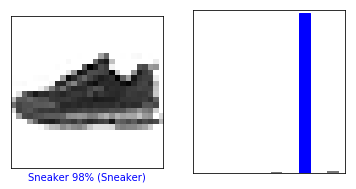

In [25]:
#lets look on the 0th image

i = 8000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

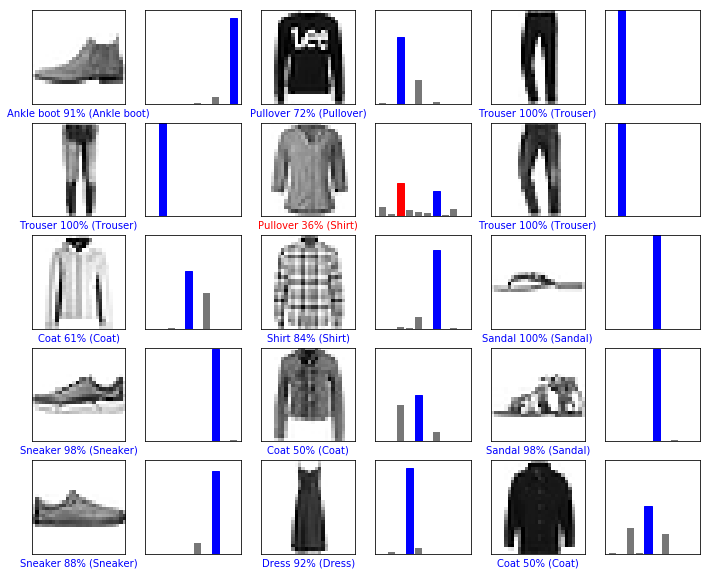

In [24]:
#lets plot multiple test data

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [18]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)
